In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
# 1. Laden
df = pd.read_csv('../../data/raw/export_insurance_portfolio_data_forecasting_2000_2025.csv')

In [5]:
df.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
0,200001,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200002,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200003,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200004,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,200005,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,3387.000000,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3387.000000,3387.000000,3387.000000,3387.000000
mean,201844.194272,8830.269560,4.393535e+06,8874.757898,4.427187e+06,174.675229,9.230146e+04,108.630351,5.737173e+04,583.332448,2.875051e+05,2.964894e+05,310.985533,1.642907e+05,1.636598e+05,581.386599,582.724305,8984.295843,514.394707,532.779232
std,515.806873,15158.567392,7.008598e+06,15175.168543,7.033158e+06,435.781811,2.063735e+05,397.447403,1.875675e+05,998.387080,4.626515e+05,4.781926e+05,1273.184986,7.466712e+05,7.456852e+05,178.115680,177.849471,28945.323321,245.513206,260.012484
min,200001.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-95466.690000,0.000000,0.000000
25%,201602.000000,884.000000,5.890981e+05,957.000000,6.212164e+05,16.000000,1.084856e+04,2.000000,9.811250e+02,25.000000,1.438223e+04,1.470320e+04,27.000000,1.833024e+04,1.824310e+04,466.394480,467.044041,0.000000,428.245811,435.681161
50%,201909.000000,2964.000000,1.805004e+06,3008.000000,1.817904e+06,57.000000,3.351302e+04,30.000000,1.830424e+04,205.000000,1.155399e+05,1.193990e+05,83.000000,5.004794e+04,5.049404e+04,549.706030,551.269252,935.330000,523.160263,537.616369
75%,202211.000000,8642.000000,4.437527e+06,8679.000000,4.457773e+06,155.000000,8.757904e+04,85.000000,4.614188e+04,608.500000,3.168872e+05,3.234964e+05,223.000000,1.254480e+05,1.254900e+05,654.648526,656.813596,8337.950000,623.250998,651.052212
max,202512.000000,73031.000000,3.931488e+07,73031.000000,3.955505e+07,7263.000000,3.282298e+06,8831.000000,3.915997e+06,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1620.440000,1230.762600,340422.340000,1620.440000,1596.510000


In [20]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              3387 non-null   int64  
 1   Product                                 3359 non-null   str    
 2   Label_Naam                              3359 non-null   str    
 3   Beginstand                              3387 non-null   int64  
 4   Jaarpremie_Beginstand                   3387 non-null   float64
 5   Eindstand                               3387 non-null   int64  
 6   Jaarpremie_Eindstand                    3387 non-null   float64
 7   NewBusiness                             3387 non-null   int64  
 8   Jaarpremie_NewBusiness                  3387 non-null   float64
 9   Royementen                              3387 non-null   int64  
 10  Geroyeerde_Jaarpremie                   3387 non-null   float64
 11  Pr

In [22]:
# 2. Aggregeren per maand (indien er meerdere labels/producten zijn)
df_agg = df.groupby('Jaar_Maand')[['Royementen', 'NewBusiness', 'Prolongaties']].sum().reset_index()

# 3. Datum format fixen
df_agg['Date'] = pd.to_datetime(df_agg['Jaar_Maand'].astype(str), format='%Y%m')
df_agg = df_agg.set_index('Date').sort_index()

# 4. Filteren: Start pas vanaf het moment dat de business serieus begon (bijv. 2010)
# Uit de eerste inspectie bleek dat data pas later echt start.
df_model = df_agg.loc['2000-01-01':] 

print(df_model.head())

            Jaar_Maand  Royementen  NewBusiness  Prolongaties
Date                                                         
2000-01-01      200001           0            0             0
2000-02-01      200002           0            0             0
2000-03-01      200003           0            0             0
2000-04-01      200004           0            0             0
2000-05-01      200005           0            0             0


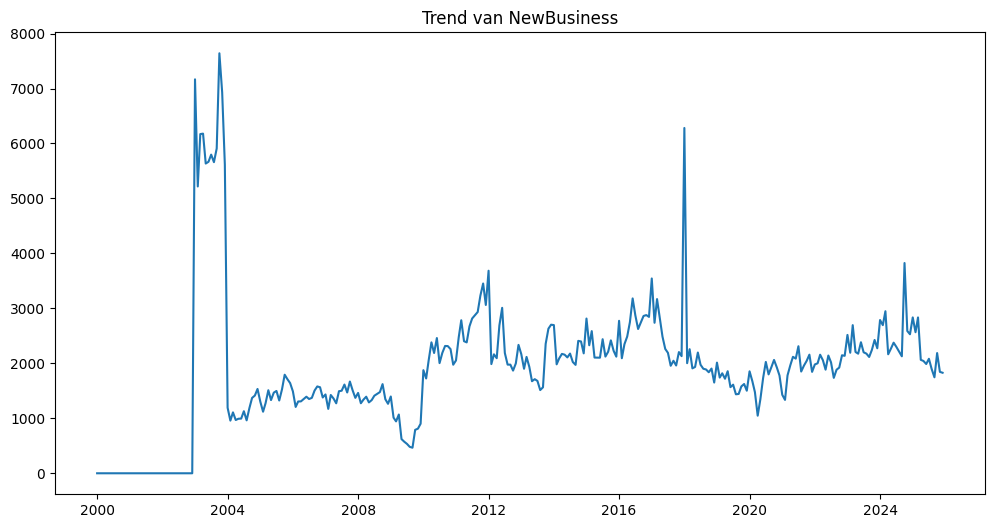

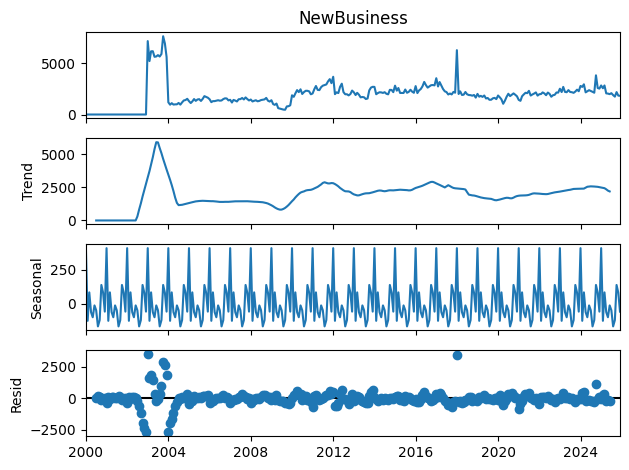

ADF Statistic: -4.187514087821427
p-value: 0.0006917105403589168
Data is stationair


In [23]:
# Kies een feature om te analyseren, bijv. 'NewBusiness'
target = 'NewBusiness'

# Visualisatie
plt.figure(figsize=(12, 6))
plt.plot(df_model[target])
plt.title(f'Trend van {target}')
plt.show()

# Seizoensdecompositie
decomposition = seasonal_decompose(df_model[target], model='additive', period=12)
decomposition.plot()
plt.show()

# Stationariteit check (ADF Test)
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationair")
    else:
        print("Data is NIET stationair (moet gedifferentieerd worden)")

check_stationarity(df_model[target])

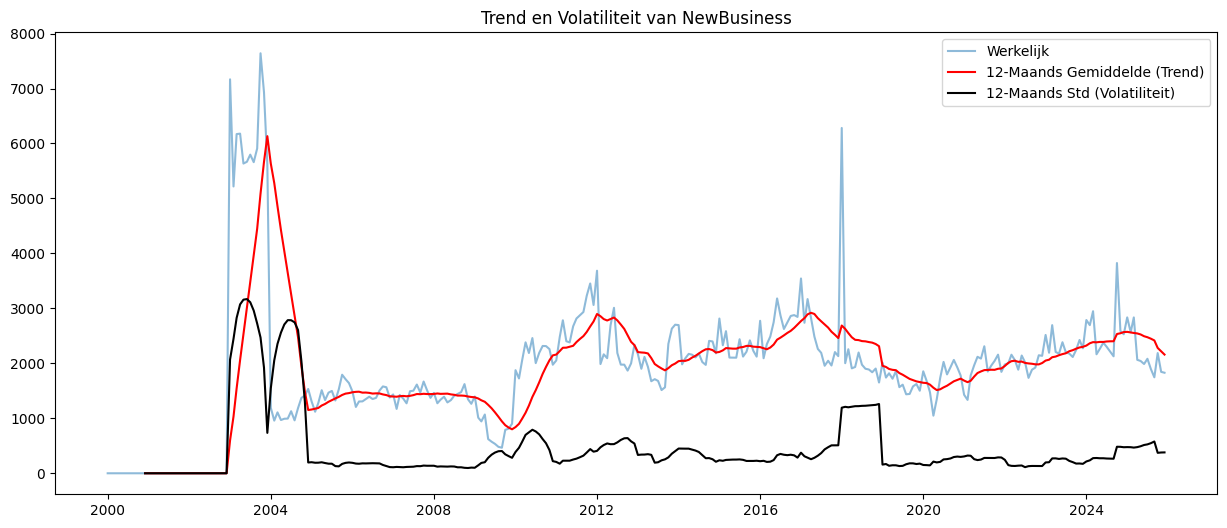

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Stel we kijken naar NewBusiness
target = 'NewBusiness'

plt.figure(figsize=(15, 6))
plt.plot(df_model[target], label='Werkelijk', alpha=0.5)
plt.plot(df_model[target].rolling(window=12).mean(), label='12-Maands Gemiddelde (Trend)', color='red')
plt.plot(df_model[target].rolling(window=12).std(), label='12-Maands Std (Volatiliteit)', color='black')
plt.title(f'Trend en Volatiliteit van {target}')
plt.legend()
plt.show()

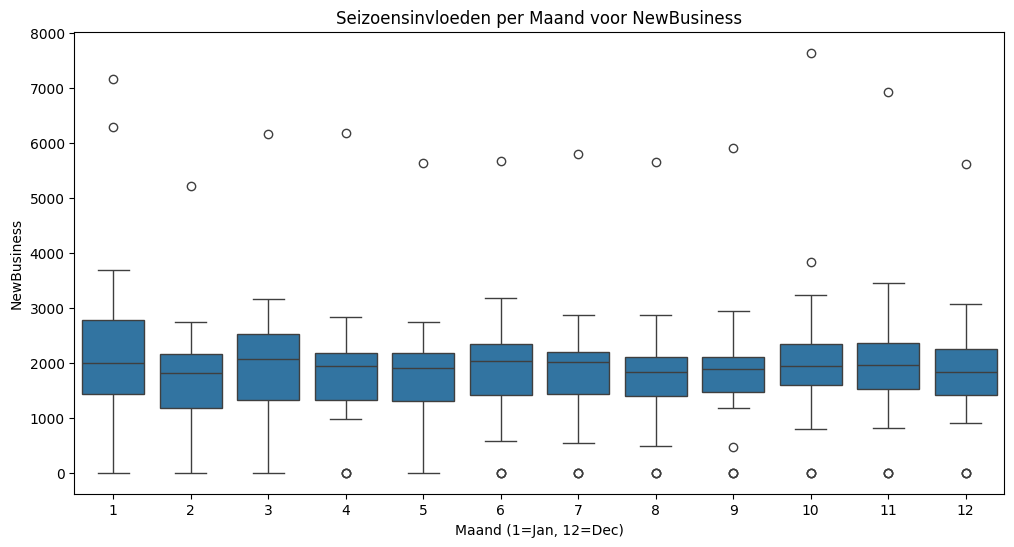

In [25]:
import seaborn as sns

# Voeg maand en jaar kolommen toe voor de plot
df_eda = df_model.copy()
df_eda['Maand'] = df_eda.index.month
df_eda['Jaar'] = df_eda.index.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='Maand', y=target, data=df_eda)
plt.title(f'Seizoensinvloeden per Maand voor {target}')
plt.xlabel('Maand (1=Jan, 12=Dec)')
plt.show()

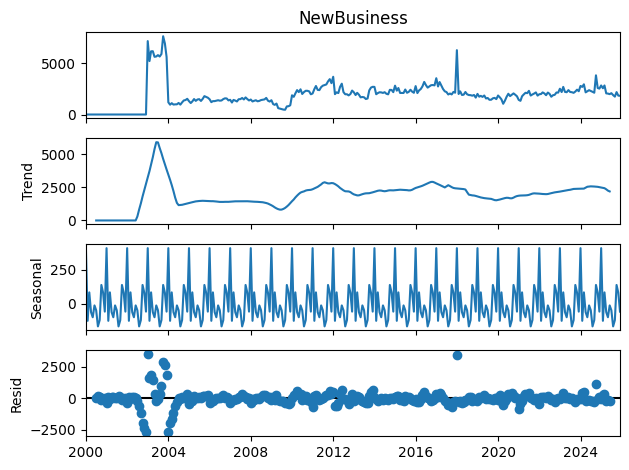

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_model[target], model='additive', period=12)
decomp.plot()
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_model[target].dropna())
print(f'ADF P-waarde: {result[1]}') 
# Als > 0.05, probeer dan: adfuller(df_model[target].diff().dropna())

ADF P-waarde: 0.0006917105403589168


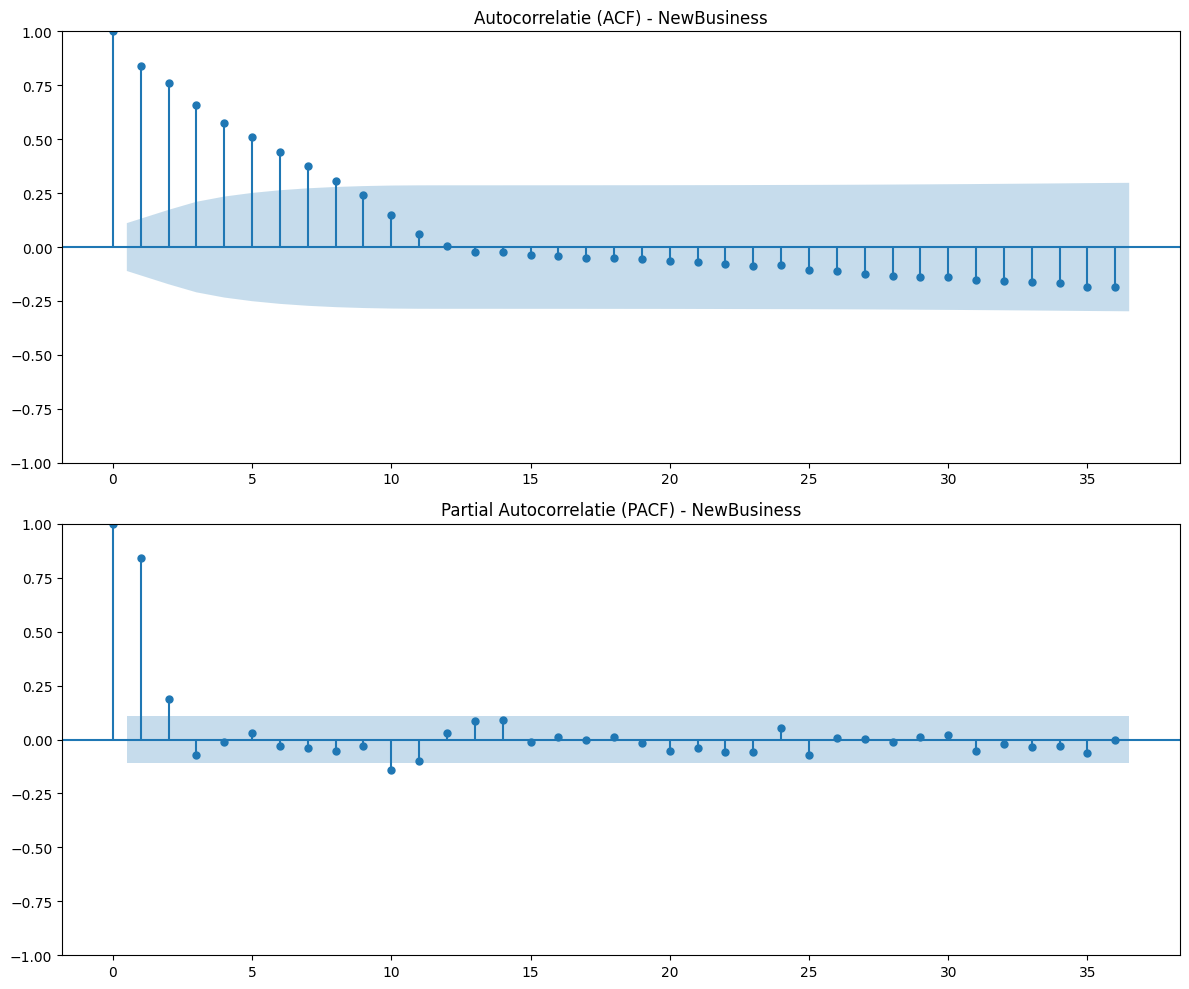

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# We kijken naar 24 of 36 maanden om seizoenspatronen te ontdekken
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ACF: Helpt bij het bepalen van de 'MA' (q) termen
plot_acf(df_model[target], lags=36, ax=ax1)
ax1.set_title(f'Autocorrelatie (ACF) - {target}')

# PACF: Helpt bij het bepalen van de 'AR' (p) termen
plot_pacf(df_model[target], lags=36, ax=ax2)
ax2.set_title(f'Partial Autocorrelatie (PACF) - {target}')

plt.tight_layout()
plt.show()